<a href="https://colab.research.google.com/github/iclalseymakoca/Renewable_Energy/blob/main/Renewable_Energy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The data set contains information about renewable energy sources.

Questions I asked:

Which renewable energy source is more/efficient/useful in which countries?
Which renewable energy source is more abundant in which country?
How do renewable energy sources compare to each other?

# **Adding Libraries**

In [1]:
!pip install geonamescache
!pip install basemap
!pip install geoplot
!pip install mapclassify
!pip install chart-studio
!pip install [module] 
!pip install chart_studio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.4/26.4 MB 41.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 864.1/864.1 KB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 46.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 KB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 75.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 82.3 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 86.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 39.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 KB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 39.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 51.4 MB/s eta 0:00:00
  Created wheel for cartopy: filename=Cartopy-0.21.1-cp39-cp39-linux_x86_64.whl size=11113620 sha256=ed24099bd553064f1d721563f6b288787674a058e5c792e95cd76a76a5032e90
  Stored in directory: /root/.cache/pip/wheels/74/b9/f5/2c94acd7cd21480e6cf63169144d7aac3e8d9cf638225ed578
Successfully built cartopy
Looking in indexes: https://pypi.org/simple, https://us-python.p

In [2]:
!sudo apt-get update && apt-get install -y libspatialindex-dev
!pip install rtree
!pip install geopandas

Get:1 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Hit:3 http://archive.ubuntu.com/ubuntu focal InRelease
Get:4 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease [18.1 kB]
Get:6 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease [1,581 B]
Get:8 http://security.ubuntu.com/ubuntu focal-security/main amd64 Packages [2,544 kB]
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Get:10 http://security.ubuntu.com/ubuntu focal-security/universe amd64 Packages [1,017 kB]
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Get:12 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 Packages [3,021 kB]
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/u

In [3]:
import pandas as pd 
import numpy as np 
import warnings 
import seaborn as sns 
import matplotlib.pyplot as plt 
import rtree
warnings.filterwarnings("ignore")
import geopandas as gpd
from shapely.geometry import Point, Polygon, MultiPolygon
from matplotlib.dates import DateFormatter

# **Reading Files and Viewing Their Contents**

In [4]:
renewable_share_energ=pd.read_csv("/content/renewable-share-energy.csv")
biofuel_production=pd.read_csv("/content/biofuel-production.csv")
cumulative_installed_wind_energy_capacity_gigawatts=pd.read_csv("/content/cumulative-installed-wind-energy-capacity-gigawatts.csv")
hydro_share_energy=pd.read_csv("/content/hydro-share-energy.csv")
hydropower_consumption=pd.read_csv("/content/hydropower-consumption.csv")
installed_geothermal_capacit=pd.read_csv("/content/installed-geothermal-capacity.csv")
installed_solar_PV_capacity=pd.read_csv("/content/installed-solar-PV-capacity.csv")
modern_renewable_energy_consumption=pd.read_csv("/content/modern-renewable-energy-consumption.csv")
modern_renewable_prod=pd.read_csv("/content/modern-renewable-prod.csv")
share_electricity_hydro=pd.read_csv("/content/share-electricity-hydro.csv")
share_electricity_renewables=pd.read_csv("/content/share-electricity-renewables.csv")
share_electricity_solar=pd.read_csv("/content/share-electricity-solar.csv")
share_electricity_wind=pd.read_csv("/content/share-electricity-wind.csv")
solar_energy_consumption=pd.read_csv("/content/solar-energy-consumption.csv")
solar_share_energy=pd.read_csv("/content/solar-share-energy.csv")
wind_generation=pd.read_csv("/content/wind-generation.csv")
wind_share_energy=pd.read_csv("/content/wind-share-energy.csv")

In [18]:
df_1 = pd.merge(wind_generation, wind_share_energy,  how='left', left_index=True, right_index=True)
df_2 = pd.merge(renewable_share_energ, biofuel_production, how='left', left_index=True, right_index=True)
df_3 = pd.merge(hydro_share_energy, hydropower_consumption,how='left', left_index=True, right_index=True)
df_4 = pd.merge(installed_geothermal_capacit, installed_solar_PV_capacity, how='left', left_index=True, right_index=True)
df_5 = pd.merge(modern_renewable_energy_consumption, modern_renewable_prod,how='left', left_index=True, right_index=True)
df_6 = pd.merge(share_electricity_hydro, share_electricity_renewables,how='left', left_index=True, right_index=True)
df_7 = pd.merge(share_electricity_solar, share_electricity_wind, how='left', left_index=True, right_index=True)
df_8 = pd.merge(solar_energy_consumption, solar_share_energy, how='left', left_index=True, right_index=True)
df_9 = pd.merge(df_1 , df_2 , how='left', left_index=True, right_index=True)
df_10 =pd.merge(df_3 , df_4,how='left', left_index=True, right_index=True)
df_11 =pd.merge(df_5 , df_7 , how='left', left_index=True, right_index=True)
df_12 = pd.merge(df_7 , df_8 , how='left', left_index=True, right_index=True)
df_13 = pd.merge(df_9 , df_10, how='left', left_index=True, right_index=True)
df_14 =  pd.merge(df_11 , df_12, how='left', left_index=True, right_index=True)
df_15 = pd.merge(df_13 , df_14 ,how='left', left_index=True, right_index=True)
df =  pd.merge(df_15 , cumulative_installed_wind_energy_capacity_gigawatts, how='left', left_index=True, right_index=True)


In [19]:
df.head()

,Entity_x_x_x_x,Code_x_x_x_x,Year_x_x_x_x,Electricity from wind (TWh)_x,Entity_y_x_x_x,Code_y_x_x_x,Year_y_x_x_x,Wind (% equivalent primary energy),Entity_x_y_x_x,Code_x_y_x_x,...,Year_x_y_y_y,Electricity from solar (TWh)_y,Entity_y_y_y_y,Code_y_y_y_y,Year_y_y_y_y,Solar (% equivalent primary energy),Entity,Code,Year,Wind Capacity
0,Afghanistan,AFG,2000,0.0,Africa,NaN,1965.0,0.0,Africa,NaN,...,2000.0,0.0,Africa,NaN,1971.0,0.0,Africa,NaN,1997.0,0.00600
1,Afghanistan,AFG,2001,0.0,Africa,NaN,1966.0,0.0,Africa,NaN,...,2001.0,0.0,Africa,NaN,1972.0,0.0,Africa,NaN,1998.0,0.01000
2,Afghanistan,AFG,2002,0.0,Africa,NaN,1967.0,0.0,Africa,NaN,...,2002.0,0.0,Africa,NaN,1973.0,0.0,Africa,NaN,1999.0,0.06400
3,Afghanistan,AFG,2003,0.0,Africa,NaN,1968.0,0.0,Africa,NaN,...,2003.0,0.0,Africa,NaN,1974.0,0.0,Africa,NaN,2000.0,0.13905
4,Afghanistan,AFG,2004,0.0,Africa,NaN,1969.0,0.0,Africa,NaN,...,2004.0,0.0,Africa,NaN,1975.0,0.0,Africa,NaN,2001.0,0.13905


In [20]:
df.tail

<bound method NDFrame.tail of      Entity_x_x_x_x Code_x_x_x_x  Year_x_x_x_x  Electricity from wind (TWh)_x  \
0       Afghanistan          AFG          2000                            0.0   
1       Afghanistan          AFG          2001                            0.0   
2       Afghanistan          AFG          2002                            0.0   
3       Afghanistan          AFG          2003                            0.0   
4       Afghanistan          AFG          2004                            0.0   
...             ...          ...           ...                            ...   
8671       Zimbabwe          ZWE          2017                            0.0   
8672       Zimbabwe          ZWE          2018                            0.0   
8673       Zimbabwe          ZWE          2019                            0.0   
8674       Zimbabwe          ZWE          2020                            0.0   
8675       Zimbabwe          ZWE          2021                            0.0  

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8676 entries, 0 to 8675
Data columns (total 74 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Entity_x_x_x_x                              8676 non-null   object 
 1   Code_x_x_x_x                                7217 non-null   object 
 2   Year_x_x_x_x                                8676 non-null   int64  
 3   Electricity from wind (TWh)_x               8676 non-null   float64
 4   Entity_y_x_x_x                              5445 non-null   object 
 5   Code_y_x_x_x                                4230 non-null   object 
 6   Year_y_x_x_x                                5445 non-null   float64
 7   Wind (% equivalent primary energy)          5445 non-null   float64
 8   Entity_x_y_x_x                              5603 non-null   object 
 9   Code_x_y_x_x                                4292 non-null   object 
 10  Year_x_y_x_x

In [22]:
df.nunique()

Entity_x_x_x_x                          251
Code_x_x_x_x                            217
Year_x_x_x_x                             58
Electricity from wind (TWh)_x          1482
Entity_y_x_x_x                          104
                                       ... 
Solar (% equivalent primary energy)    2122
Entity                                   62
Code                                     46
Year                                     27
Wind Capacity                          1182
Length: 74, dtype: int64

<Axes: >

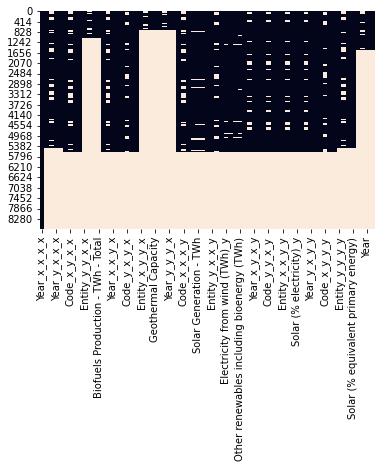

In [58]:
sns.heatmap(df.isnull(), cbar=False)

In [42]:
df.describe()

,Year_x_x_x_x,Year_y_x_x_x,Wind (% equivalent primary energy),Year_x_y_x_x,Renewables (% equivalent primary energy),Year_y_y_x_x,Biofuels Production - TWh - Total,Year_x_x_y_x,Hydro (% equivalent primary energy),Year_y_x_y_x,...,Year_x_x_y_y,Solar (% electricity)_y,Year_y_x_y_y,Wind (% electricity)_y,Year_x_y_y_y,Electricity from solar (TWh)_y,Year_y_y_y_y,Solar (% equivalent primary energy),Year,Wind Capacity
count,8676.000000,5445.000000,5445.000000,5603.000000,5603.000000,1081.000000,1081.000000,5603.000000,5603.000000,5603.000000,...,5610.000000,5610.000000,5610.000000,5610.000000,5610.000000,5610.000000,5442.000000,5442.000000,1540.000000,1540.000000
mean,2000.344168,1994.368595,0.440741,1993.800821,10.735585,2005.830712,56.543887,1993.800821,9.321855,2000.557915,...,2006.695187,0.594817,2006.695187,1.430548,2000.925668,5.405816,1994.385888,0.129722,2009.068182,19.822411
std,15.507389,16.180258,1.533420,16.283556,12.923945,9.197525,138.262878,16.283556,11.947563,15.523795,...,9.533071,2.055800,9.533071,4.605084,15.289388,38.755787,16.168541,0.475133,7.187177,63.736134
min,1965.000000,1965.000000,0.000000,1965.000000,0.000000,1990.000000,0.000000,1965.000000,0.000000,1965.000000,...,1985.000000,0.000000,1985.000000,0.000000,1965.000000,0.000000,1965.000000,0.000000,1995.000000,0.000000
25%,1990.000000,1981.000000,0.000000,1980.000000,1.980135,1998.000000,0.000000,1980.000000,1.210476,1990.000000,...,2001.000000,0.000000,2001.000000,0.000000,1991.000000,0.000000,1981.000000,0.000000,2003.000000,0.082000
50%,2004.000000,1995.000000,0.000000,1994.000000,6.522184,2006.000000,3.642700,1994.000000,5.561826,2004.000000,...,2008.000000,0.000000,2008.000000,0.000000,2005.000000,0.000000,1995.000000,0.000000,2009.000000,0.941650
75%,2013.000000,2008.000000,0.052514,2008.000000,14.099622,2014.000000,32.786575,2008.000000,11.462906,2013.000000,...,2015.000000,0.061795,2015.000000,0.407206,2013.000000,0.010000,2008.000000,0.003650,2015.000000,6.096985
max,2022.000000,2021.000000,24.614344,2021.000000,86.874535,2021.000000,1114.488300,2021.000000,72.310486,2022.000000,...,2022.000000,40.000000,2022.000000,56.839542,2022.000000,937.750000,2021.000000,5.999280,2021.000000,824.874060


# **EDA**

In [43]:
df.corr()

,Year_x_x_x_x,Year_y_x_x_x,Wind (% equivalent primary energy),Year_x_y_x_x,Renewables (% equivalent primary energy),Year_y_y_x_x,Biofuels Production - TWh - Total,Year_x_x_y_x,Hydro (% equivalent primary energy),Year_y_x_y_x,...,Year_x_x_y_y,Solar (% electricity)_y,Year_y_x_y_y,Wind (% electricity)_y,Year_x_y_y_y,Electricity from solar (TWh)_y,Year_y_y_y_y,Solar (% equivalent primary energy),Year,Wind Capacity
Year_x_x_x_x,1.000000,-0.076057,-0.009196,0.006543,0.018299,-0.054520,-0.121404,0.006543,-0.001407,0.170889,...,-0.011404,-0.015237,-0.011404,0.017066,0.344694,0.058309,-0.018643,-0.088338,0.036472,-0.078400
Year_y_x_x_x,-0.076057,1.000000,0.370018,0.202833,0.018530,-0.011700,0.126095,0.202833,-0.014102,-0.056396,...,0.016455,0.003368,0.016455,-0.006020,-0.035847,0.034827,0.279307,0.237814,-0.004872,-0.042929
Wind (% equivalent primary energy),-0.009196,0.370018,1.000000,-0.050647,-0.032014,0.004498,0.058943,-0.050647,-0.048408,-0.000106,...,-0.068511,-0.014412,-0.068511,-0.038029,0.020804,-0.007981,-0.126070,0.140338,-0.021813,-0.016777
Year_x_y_x_x,0.006543,0.202833,-0.050647,1.000000,0.108083,0.071461,-0.010932,1.000000,-0.002777,0.012466,...,0.073959,-0.001625,0.073959,-0.001905,-0.082379,0.001701,0.212793,0.098136,0.001676,-0.010436
Renewables (% equivalent primary energy),0.018299,0.018530,-0.032014,0.108083,1.000000,0.061478,0.207125,0.108083,0.969813,0.018961,...,0.003208,0.003662,0.003208,-0.033261,0.004734,-0.037058,0.004060,-0.000996,0.014084,-0.082867
Year_y_y_x_x,-0.054520,-0.011700,0.004498,0.071461,0.061478,1.000000,0.305252,0.071461,0.041693,-0.031141,...,0.032573,-0.101728,0.032573,-0.109626,-0.026508,-0.005884,0.011889,0.022637,-0.004803,-0.058521
Biofuels Production - TWh - Total,-0.121404,0.126095,0.058943,-0.010932,0.207125,0.305252,1.000000,-0.010932,0.206348,-0.164984,...,0.095766,-0.051467,0.095766,-0.065729,-0.018216,-0.042419,0.092572,0.065099,-0.038723,-0.088157
Year_x_x_y_x,0.006543,0.202833,-0.050647,1.000000,0.108083,0.071461,-0.010932,1.000000,-0.002777,0.012466,...,0.073959,-0.001625,0.073959,-0.001905,-0.082379,0.001701,0.212793,0.098136,0.001676,-0.010436
Hydro (% equivalent primary energy),-0.001407,-0.014102,-0.048408,-0.002777,0.969813,0.041693,0.206348,-0.002777,1.000000,0.027723,...,-0.004231,-0.006005,-0.004231,-0.032074,-0.006269,-0.034128,-0.011138,-0.035826,0.018860,-0.081269
Year_y_x_y_x,0.170889,-0.056396,-0.000106,0.012466,0.018961,-0.031141,-0.164984,0.012466,0.027723,1.000000,...,0.008610,0.048523,0.008610,-0.035111,0.145028,0.030709,-0.062136,-0.005689,0.015155,0.037553


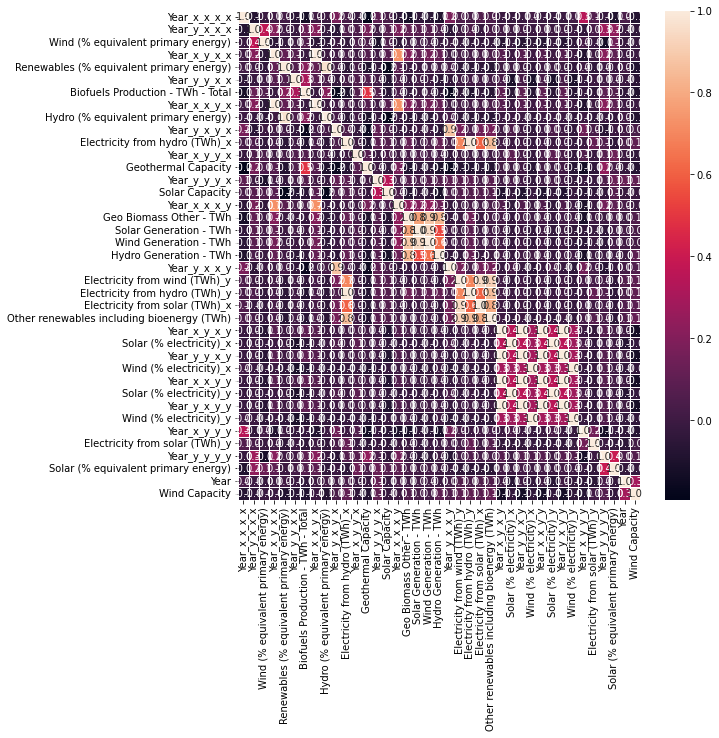

In [44]:
f,ax = plt.subplots(figsize=(9, 9))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

Text(0, 0.5, 'Renewables (% equivalent primary energy)')

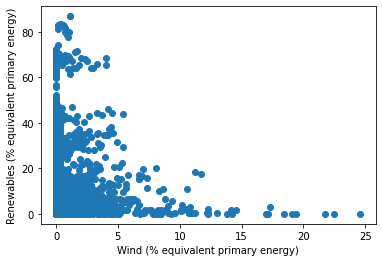

In [52]:
plt.scatter(df['Wind (% equivalent primary energy)'], 
            df['Renewables (% equivalent primary energy)'])
plt.xlabel('Wind (% equivalent primary energy)')
plt.ylabel('Renewables (% equivalent primary energy)')

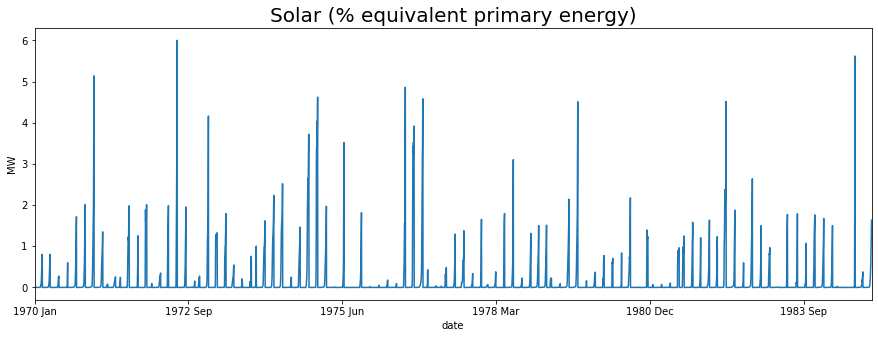

In [40]:
plt.figure(figsize=(15,5))
plt.plot(df['Solar (% equivalent primary energy)'])
plt.title('Solar (% equivalent primary energy)', fontsize=20)
plt.ylabel('MW')
plt.xlabel('date')
ax = plt.gca()

ax.autoscale(enable=True, axis='x', tight=True)
ax.xaxis.set_major_formatter(DateFormatter("%Y %b"))
plt.show()

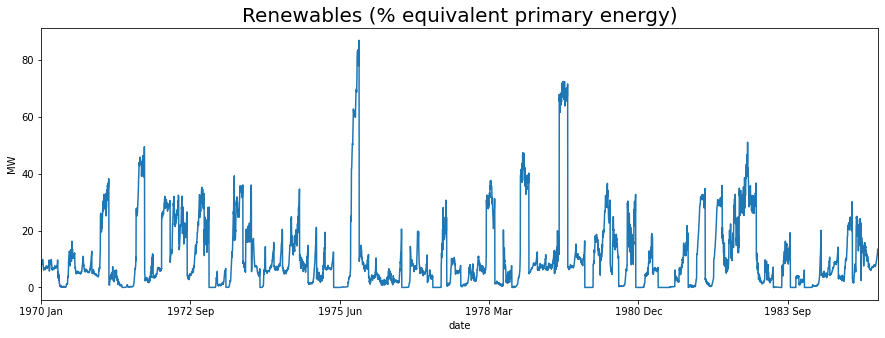

In [29]:
plt.figure(figsize=(15,5))
plt.plot(df['Renewables (% equivalent primary energy)'])
plt.title('Renewables (% equivalent primary energy)', fontsize=20)
plt.ylabel('MW')
plt.xlabel('date')
ax = plt.gca()

ax.autoscale(enable=True, axis='x', tight=True)
ax.xaxis.set_major_formatter(DateFormatter("%Y %b"))
plt.show()

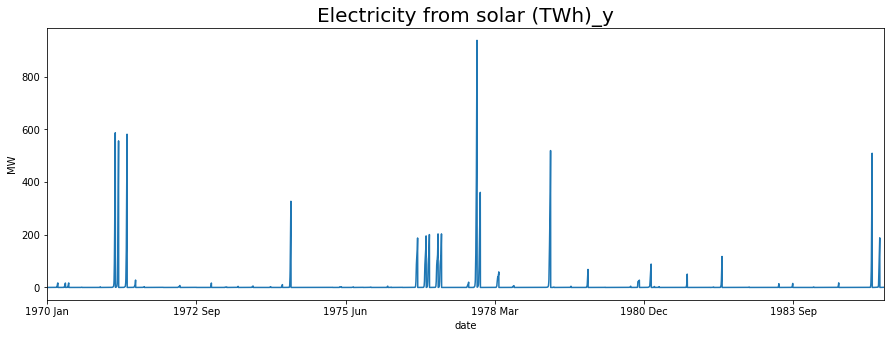

In [31]:
plt.figure(figsize=(15,5))
plt.plot(df['Electricity from solar (TWh)_y'])
plt.title('Electricity from solar (TWh)_y', fontsize=20)
plt.ylabel('MW')
plt.xlabel('date')
ax = plt.gca()

ax.autoscale(enable=True, axis='x', tight=True)
ax.xaxis.set_major_formatter(DateFormatter("%Y %b"))
plt.show()

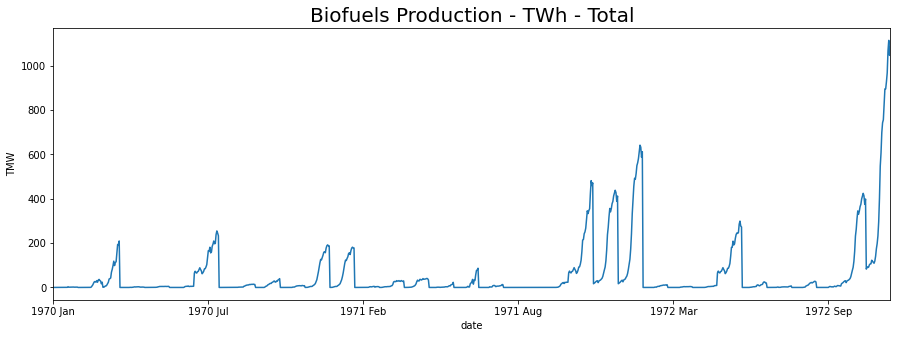

In [34]:
plt.figure(figsize=(15,5))
plt.plot(df['Biofuels Production - TWh - Total'])
plt.title('Biofuels Production - TWh - Total', fontsize=20)
plt.ylabel('TMW')
plt.xlabel('date')
ax = plt.gca()

ax.autoscale(enable=True, axis='x', tight=True)
ax.xaxis.set_major_formatter(DateFormatter("%Y %b"))
plt.show()

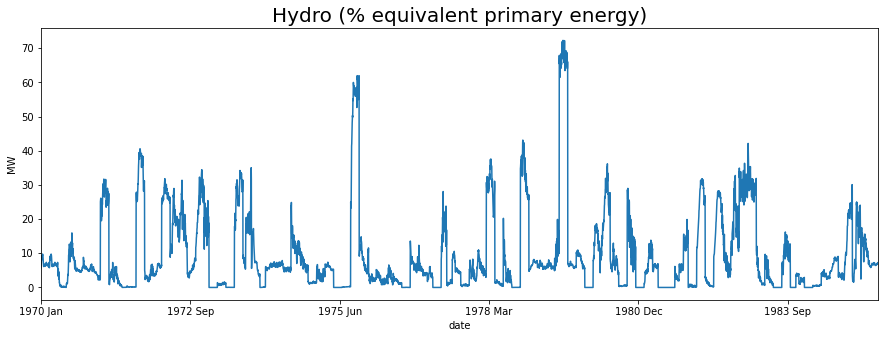

In [35]:
plt.figure(figsize=(15,5))
plt.plot(df['Hydro (% equivalent primary energy)'])
plt.title('Hydro (% equivalent primary energy)', fontsize=20)
plt.ylabel('MW')
plt.xlabel('date')
ax = plt.gca()

ax.autoscale(enable=True, axis='x', tight=True)
ax.xaxis.set_major_formatter(DateFormatter("%Y %b"))
plt.show()

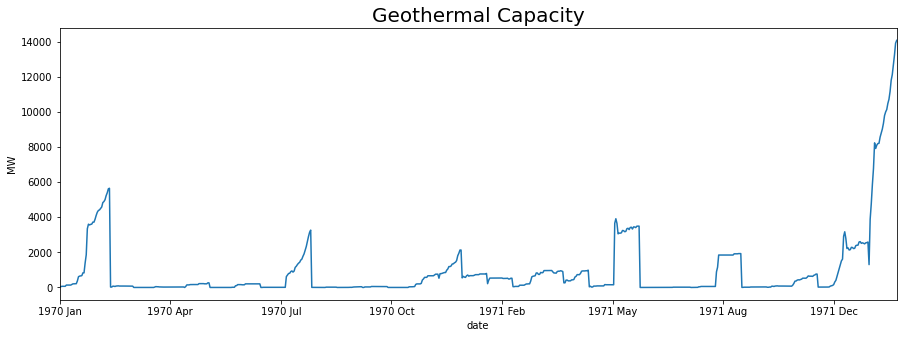

In [57]:
plt.figure(figsize=(15,5))
plt.plot(df['Geothermal Capacity'])
plt.title('Geothermal Capacity', fontsize=20)
plt.ylabel('MW')
plt.xlabel('date')
ax = plt.gca()

ax.autoscale(enable=True, axis='x', tight=True)
ax.xaxis.set_major_formatter(DateFormatter("%Y %b"))
plt.show()

In [15]:
# import the folium library
import folium

# initialize the map and store it in a m object
m = folium.Map(location=[40, -95], zoom_start=4)

# show the map
m

In [14]:
import pandas as pd
import plotly

# Read data 
df = pd.read_csv('/content/renewable-share-energy.csv')

# Read values of axes 
life_exp = df.iloc[:,2]
health_exp= df.iloc[:,3]

# Define the data to be visualised and some of the parameters of the visualisation
data = [ dict(
        type = 'choropleth',
        colorscale = 'Rainbow',
        locations = df['Entity'],
        z = life_exp,
        text = df['Year'],

        colorbar = dict(
            title = 'Renewables (% equivalent primary energy)', 
            titlefont=dict(size=25),
            tickfont=dict(size=18))
      ) ]

# Define layout
layout = dict(
    title = 'Life Expectancy at Birth',
    titlefont = dict(size=40),
    geo = dict(
        showframe = True,
        showcoastlines = True,
        projection = dict(type = 'equirectangular')
              )
             )

# Plot
fig = dict( data=data, layout=layout )
plot_url = plotly.offline.plot(fig, validate=False, filename='world.py')
projection = dict(type = 'orthographic')